## Explanatory Data Analysis (EDA)

Academic project from UTA

Data has 520 rows and 4 columns<br>
Each row represents a week


<h3>Independant Variable</h3>
<ul>
    <li><strong>rebate:</strong> \$ pay back spent on each purchase</li>
    <li><strong>ad.spent:</strong> MIL $ spent on Advertisement</li>
    <li><strong>xmas:</strong> every last 6 weeks in each year. 0 is off-season, 1 is christmas season</li>
</ul>

<h3>Dependant Variable</h3>
<ul>
    <li><strong>sales:</strong> BIL $ revenue</li>
</ul>

<h2>Import necessary modules</h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<h2>Data load</h2>

In [2]:
data = pd.read_csv("project1.2.csv")
data.head()

,rebate,ad.spent,xmas,sales
0,20.959315,7296.364685,0,3960.110493
1,17.363389,8053.313960,0,4055.298498
2,13.838921,8633.622563,0,4056.904299
3,15.974051,10972.713067,0,4628.763542
4,15.508211,2860.179092,0,2853.628735


<h2>Visualization</h2>

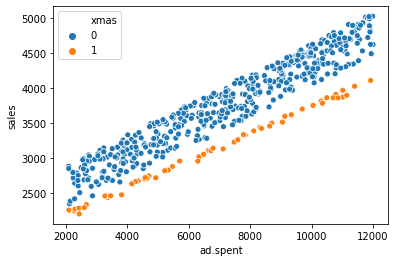

In [3]:
g = sns.scatterplot(x="ad.spent", y="sales", hue="xmas", data=data)

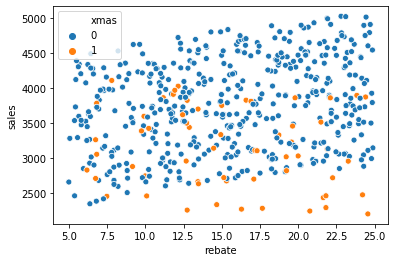

In [4]:
g = sns.scatterplot(x="rebate", y="sales", hue="xmas", data=data)

Text(0, 0.5, 'Sales')

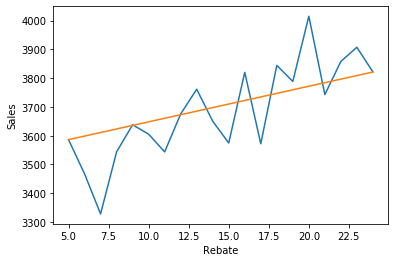

In [5]:
data['rebate_ca'] = data['rebate'] // 1
a = data.groupby('rebate_ca').sales.mean().reset_index(name = 'sales_avg')
plt.plot(a.rebate_ca, a.sales_avg)
plt.plot([a.rebate_ca.iloc[0], a.rebate_ca.iloc[-1]], [a.sales_avg.iloc[0], a.sales_avg.iloc[-1]])
plt.xlabel('Rebate')
plt.ylabel('Sales')

Text(0, 0.5, 'Sales')

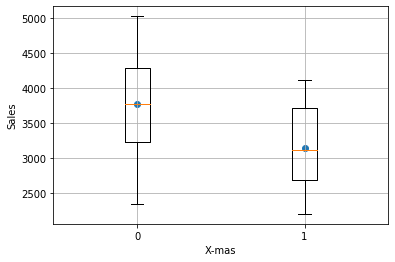

In [6]:
xmas = data.groupby('xmas').mean().sales
plt.grid()
plt.boxplot((data.loc[data.xmas==0,'sales'], data.loc[data.xmas==1, 'sales']), labels=[0,1])
plt.scatter([1,2],xmas)
plt.xlabel('X-mas')
plt.ylabel('Sales')

<h2>Scipy optimize  w/o xmas</h2>

In [7]:
from scipy.optimize import least_squares

In [8]:
def simple_regression(c, x):
    #c[0] : intercept
    #x[0] : rebate
    #c[1] : coefficient for rebate
    #x[1] : ad.spent
    #c[2] : coefficient for ad.spent
    #x[2] : xmas
    #c[3] : coefficient for xmas
    return c[0] + c[1]*x[0] + c[2]*x[1] + c[3]*x[2]

def diminishing_return(x, r):
    return (1-np.exp((-1)*x*r)) / r

def regression_with_diminishing_return(c, x):
    #c[4] : r for rebate
    #c[5] : r for ad.spent
    return c[0] + c[1]*diminishing_return(x[0],c[4]) + c[2]*diminishing_return(x[1],c[5]) + c[3]*x[2]

def simple_func(c,x,y):
    return y - simple_regression(c,x)

def diminishing_func(c,x,y):
    return y - regression_with_diminishing_return(c,x)

In [9]:
c_sim = np.random.rand(4)
c_dim = np.random.rand(6)
c_dim

array([0.22993896, 0.4934173 , 0.61156023, 0.8440629 , 0.61212549,
       0.50976449])

In [10]:
x = data[['rebate','ad.spent','xmas']].values.T
y = data['sales'].values
x

array([[2.09593152e+01, 1.73633886e+01, 1.38389212e+01, ...,
        1.49386342e+01, 1.26747940e+01, 1.24418155e+01],
       [7.29636469e+03, 8.05331396e+03, 8.63362256e+03, ...,
        7.77686919e+03, 5.70031946e+03, 9.33587188e+03],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00]])

<h2>Simple Regression</h2>

In [11]:
# simple_regression
c_sim = np.random.rand(4)
solv1 = least_squares(simple_func, c_sim, args = (x, y))
print(solv1.x)

[ 1.79396527e+03  2.67989094e+01  2.17345683e-01 -5.66719648e+02]


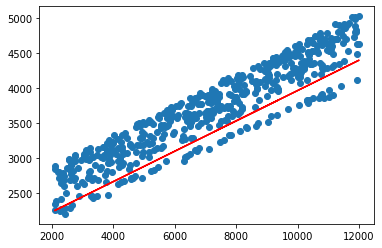

In [12]:
#ad.spent
plt.scatter(x[1], y)
plt.plot(x[1], solv1.x[0]+solv1.x[2]*x[1], color='red')

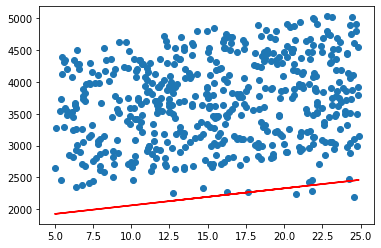

In [13]:
#rebate
plt.scatter(x[0],y)
plt.plot(x[0], solv1.x[0]+solv1.x[1]*x[0], color = 'red')

Text(0, 0.5, 'Real')

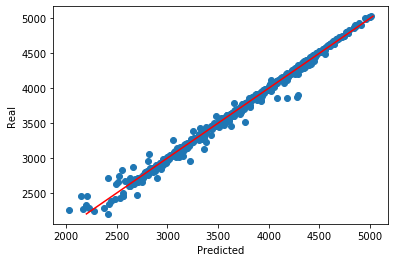

In [14]:
# predicted vs real
plt.scatter(simple_regression(solv1.x, x), y)
plt.plot([y.min(),y.max()], [y.min(),y.max()], color='red')
plt.xlabel('Predicted')
plt.ylabel('Real')

<h2>Diminishing return</h2>

In [15]:
#diminishing return
solv2 = least_squares(diminishing_func, c_dim, args=(x, y))
print(solv2.x)

[ 1.62454914e+03  5.55722515e+01  2.18054306e-01 -5.69636094e+02
  4.90808611e-02  4.51620807e-07]


/home/study/jupyter/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in exp
  if sys.path[0] == '':
/home/study/jupyter/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in true_divide
  if sys.path[0] == '':


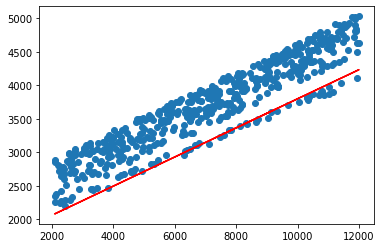

In [16]:
#ad.spent
plt.scatter(x[1], y)
plt.plot(x[1], solv2.x[0]+solv2.x[2]*diminishing_return(x[1],solv2.x[5]), color='red')

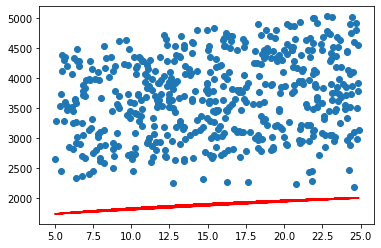

In [17]:
#rebate
plt.scatter(x[0],y)
plt.plot(x[0], solv2.x[0]+solv1.x[1]*diminishing_return(x[0], solv2.x[4]), color='red')

Text(0, 0.5, 'Real')

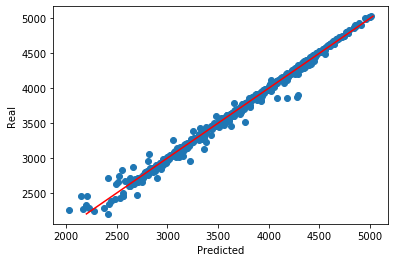

In [18]:
# predicted vs real    simple regression
plt.scatter(simple_regression(solv1.x, x), y)
plt.plot([y.min(),y.max()], [y.min(),y.max()], color='red')
plt.xlabel('Predicted')
plt.ylabel('Real')

Text(0, 0.5, 'Real')

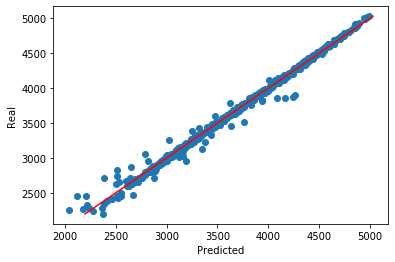

In [19]:
# predicted vs real  Diminishing Return
plt.scatter(regression_with_diminishing_return(solv2.x,x),y)
plt.plot([y.min(),y.max()], [y.min(),y.max()], color='red')
plt.xlabel('Predicted')
plt.ylabel('Real')

<h2>Using dummy data for validating the model (Algorithm validation)</h2>

In [20]:
# simple_regression
np.random.seed(0)
e = np.random.randn(10000)
x_rand = np.random.randint(1,10000,(2,10000))
xmas_rand = np.random.randint(0,2,(1,10000))
x_rand = np.vstack((x_rand, xmas_rand))
y_rand_sim = simple_regression(solv1.x, x_rand) + e

In [21]:
solv4 = least_squares(simple_func, c_sim, args=(x_rand, y_rand_sim))
print(solv4.x)
print(solv1.x)
print(solv4.x - solv1.x)
## Both calculated outputs look so similar which means Algorithm works well

[ 1.79399928e+03  2.67989063e+01  2.17339155e-01 -5.66728977e+02]
[ 1.79396527e+03  2.67989094e+01  2.17345683e-01 -5.66719648e+02]
[ 3.40124727e-02 -3.04309349e-06 -6.52797594e-06 -9.32974623e-03]


In [22]:
# diminishing return
np.random.seed(0)
e = np.random.randn(10000)
x_rand = np.random.randint(1,10000, (2,10000))
xmas_rand = np.random.randint(0,2, (1,10000))
x_rand = np.vstack((x_rand, xmas_rand))
y_rand_dim = regression_with_diminishing_return(solv2.x, x_rand) + e

In [23]:
solv3 = least_squares(diminishing_func, c_dim, args=(x_rand, y_rand_dim))
print(solv3.x)
print(solv2.x)
print(solv3.x - solv2.x)

/home/study/jupyter/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in exp
  if sys.path[0] == '':
/home/study/jupyter/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in true_divide
  if sys.path[0] == '':


[ 1.62459730e+03  5.55715372e+01  2.18065269e-01 -5.69645678e+02
  4.90827673e-02  4.67749746e-07]
[ 1.62454914e+03  5.55722515e+01  2.18054306e-01 -5.69636094e+02
  4.90808611e-02  4.51620807e-07]
[ 4.81620251e-02 -7.14289558e-04  1.09630436e-05 -9.58336275e-03
  1.90623842e-06  1.61289394e-08]


<h1>With standardized data</h1>

In [24]:
# n_data = (data - data.mean())/data.std()
#normalize only continuous variables
n_data = data.copy()
n_data['rebate'] = (n_data['rebate'] - n_data['rebate'].mean())/n_data['rebate'].std()
n_data['ad.spent'] = (n_data['ad.spent'] - n_data['ad.spent'].mean())/n_data['ad.spent'].std()
n_data['sales'] = (n_data['sales'] - n_data['sales'].mean())/n_data['sales'].std()

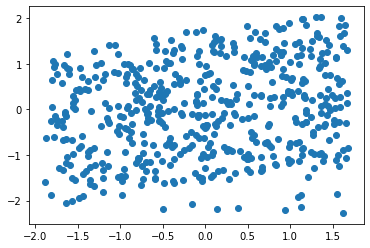

In [25]:
plt.scatter(n_data['rebate'], n_data['sales'])

In [26]:
n_x = n_data[['rebate','ad.spent','xmas']].values.T
n_y = n_data['sales'].values
n_x[0].min()

-1.886310513276334

In [27]:
# simple_regression
c_sim = np.random.randn(4)
n_solv1 = least_squares(simple_func, c_sim, args = (n_x, n_y))
print(n_solv1.x)

[ 0.09943826  0.22743312  0.92951943 -0.86179823]


In [28]:
print(n_solv1.x)
print(data.mean())
print(data.std())

[ 0.09943826  0.22743312  0.92951943 -0.86179823]
rebate         15.528561
ad.spent     7137.804870
xmas            0.115385
sales        3696.094101
rebate_ca      15.034615
dtype: float64
rebate          5.580836
ad.spent     2812.354908
xmas            0.319793
sales         657.601315
rebate_ca       5.607141
dtype: float64


In [29]:
#diminishing return
n_solv2 = least_squares(diminishing_func, c_dim, args=(n_x, n_y))
print(n_solv2.x)

[ 0.13117011  0.2200872   0.92954868 -0.86623322  0.27391241  0.00126999]


<h2>Scipy w/ xmas interaction</h2>

In [30]:
def simple_regression_interaction(c, x):
    #c[0] : intercept
    #x[0] : rebate
    #c[1] : coefficient for rebate
    #x[1] : ad.spent
    #c[2] : coefficient for ad.spent
    #x[2] : xmas
    #c[3] : coefficient for xmas
    #c[4] : coefficient for rebate * xmas
    #c[5] : coefficient for ad.spent * xmas
    #c[6] : coefficient for rebate * ad.spent
    return c[0] + c[1]*x[0] + c[2]*x[1] + c[3]*x[2] + c[4]*x[0]*x[2] + c[5]*x[1]*x[2] + c[6]*x[0]*x[1]

def diminishing_return(x, r):
    return (1-np.exp((-1)*x*r)) / r

def regression_with_diminishing_return_interaction(c, x):
    #c[7] : r for rebate
    #c[8] : r for ad.spent
    return c[0] + c[1]*diminishing_return(x[0],c[7]) + c[2]*diminishing_return(x[1],c[8]) + c[3]*x[2] + c[4]*x[0]*x[2] + c[5]*x[1]*x[2] + c[6]*x[0]*x[1]

def simple_func_interaction(c,x,y):
    return y - simple_regression_interaction(c,x)

def diminishing_func_interaction(c,x,y):
    return y - regression_with_diminishing_return_interaction(c,x)

In [31]:
c_sim_inter = np.random.rand(7)
c_dim_inter = np.random.rand(9)

In [32]:
# simple_regression_interaction
c_sim_inter = np.random.rand(7)
solv1_inter = least_squares(simple_func_interaction, c_sim_inter, args = (x, y))
print(c_sim_inter)
print(solv1_inter.x)

[0.7875244  0.60510403 0.37916172 0.6148601  0.29148469 0.12359269
 0.04283849]
[ 1.73235301e+03  2.95069446e+01  2.18881939e-01  1.45322425e+02
 -3.37441190e+01 -2.76665481e-02  7.65766416e-05]


Text(0, 0.5, 'Real')

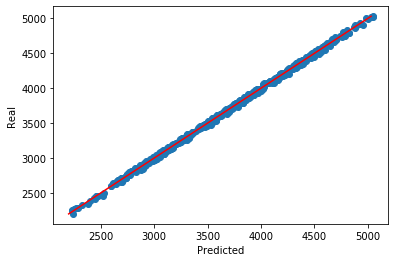

In [33]:
# predicted vs real    simpe regression _ interaction
plt.scatter(simple_regression_interaction(solv1_inter.x, x), y)
plt.plot([y.min(),y.max()], [y.min(),y.max()], color='red')
plt.xlabel('Predicted')
plt.ylabel('Real')

In [34]:
# diminishing_return_interaction
solv2_inter = least_squares(diminishing_func_interaction, c_dim_inter, args = (x, y))
print(solv2_inter.x)

[ 1.56994147e+03  5.62829394e+01  2.19579626e-01  1.42228245e+02
 -3.35722944e+01 -2.80292156e-02  8.62772279e-06  4.22173024e-02
 -2.85688390e-07]


/home/study/jupyter/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in exp
  from ipykernel import kernelapp as app


Text(0, 0.5, 'Real')

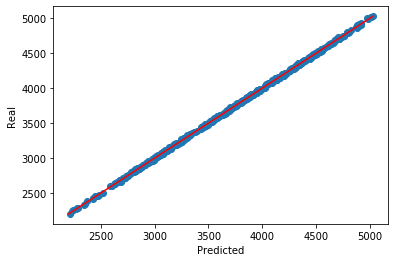

In [35]:
# predicted vs real  Diminishing Return
plt.scatter(regression_with_diminishing_return_interaction(solv2_inter.x, x), y)
plt.plot([y.min(),y.max()], [y.min(),y.max()], color='red')
plt.xlabel('Predicted')
plt.ylabel('Real')

Text(0, 0.5, 'Real')

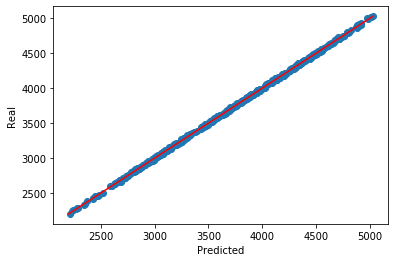

In [36]:
plt.scatter(regression_with_diminishing_return_interaction(solv2_inter.x, x), y)
plt.plot([y.min(),y.max()], [y.min(),y.max()], color='red')
plt.xlabel('Predicted')
plt.ylabel('Real')

<h2>Hypothesis test</h2>
<h3>parameters</h3>
<ul>
    <li>c[0] : intercept</li>
    <li>x[0] : rebate</li>
    <li>c[1] : coefficient for rebate</li>
    <li>x[1] : ad.spent</li>
    <li>c[2] : coefficient for ad.spent</li>
    <li>x[2] : xmas</li>
    <li>c[3] : coefficient for xmas</li>
    <li>c[4] : coefficient for rebate * xmas</li>
    <li>c[5] : coefficient for ad.spent * xmas</li>
    <li>c[6] : coefficient for rebate * ad.spent</li>
    <li>c[7] : coefficient for rebate * ad.spent * xmas</li>
    <li>c[7] : r for rebate</li>
    <li>c[8] : r for ad.spent</li>
</ul>

<h3>Equation</h3>
<div>$Sales = c[0] + c[1] \left [ \frac{1-e^{-x[0]\cdot c[7]}}{b} \right ] + c[2] \left [ \frac{1-e^{-x[1]\cdot c[8]}}{b} \right ] + c[3]\cdot x[2] + c[4]( x[0]\cdot x[2])+c[5]( x[1]\cdot x[2])+c[6](x[0]\cdot x[1])$</div>
<a hidden="True" href="https://www.codecogs.com/eqnedit.php?latex=Sales&space;=&space;c[0]&space;&plus;&space;c[1]&space;\left&space;[&space;\frac{1-e^{-x[0]\cdot&space;c[7]}}{b}&space;\right&space;]&space;&plus;&space;c[2]&space;\left&space;[&space;\frac{1-e^{-x[1]\cdot&space;c[8]}}{b}&space;\right&space;]&space;&plus;&space;c[3]\cdot&space;x[2]&space;&plus;&space;c[4](&space;x[0]\cdot&space;x[2])&plus;c[5](&space;x[1]\cdot&space;x[2])&plus;c[6](x[0]\cdot&space;x[1])" target="_blank"><img src="https://latex.codecogs.com/gif.latex?Sales&space;=&space;c[0]&space;&plus;&space;c[1]&space;\left&space;[&space;\frac{1-e^{-x[0]\cdot&space;c[7]}}{b}&space;\right&space;]&space;&plus;&space;c[2]&space;\left&space;[&space;\frac{1-e^{-x[1]\cdot&space;c[8]}}{b}&space;\right&space;]&space;&plus;&space;c[3]\cdot&space;x[2]&space;&plus;&space;c[4](&space;x[0]\cdot&space;x[2])&plus;c[5](&space;x[1]\cdot&space;x[2])&plus;c[6](x[0]\cdot&space;x[1])" title="Sales = c[0] + c[1] \left [ \frac{1-e^{-x[0]\cdot c[7]}}{b} \right ] + c[2] \left [ \frac{1-e^{-x[1]\cdot c[8]}}{b} \right ] + c[3]\cdot x[2] + c[4]( x[0]\cdot x[2])+c[5]( x[1]\cdot x[2])+c[6](x[0]\cdot x[1])" /></a>

In [37]:
def test_c0(c,x):
    return 0*c[0] + c[1]*diminishing_return(x[0],c[7]) + c[2]*diminishing_return(x[1],c[8]) + c[3]*x[2] + c[4]*x[0]*x[2] + c[5]*x[1]*x[2] + c[6]*x[0]*x[1]

def test_c1(c,x):
    return c[0] + c[2]*diminishing_return(x[1],c[8]) + c[3]*x[2] + c[4]*x[0]*x[2] + c[5]*x[1]*x[2] + c[6]*x[0]*x[1]

def test_c2(c,x):
    return c[0] + c[1]*diminishing_return(x[0],c[7]) + c[3]*x[2] + c[4]*x[0]*x[2] + c[5]*x[1]*x[2] + c[6]*x[0]*x[1]

def test_c3(c,x):
    return c[0] + c[1]*diminishing_return(x[0],c[7]) + c[2]*diminishing_return(x[1],c[8]) + c[4]*x[0]*x[2] + c[5]*x[1]*x[2] + c[6]*x[0]*x[1]

def test_c4(c,x):
    return c[0] + c[1]*diminishing_return(x[0],c[7]) + c[2]*diminishing_return(x[1],c[8]) + c[3]*x[2] + c[5]*x[1]*x[2] + c[6]*x[0]*x[1]

def test_c5(c,x):
    return c[0] + c[1]*diminishing_return(x[0],c[7]) + c[2]*diminishing_return(x[1],c[8]) + c[3]*x[2] + c[4]*x[0]*x[2] + c[6]*x[0]*x[1]

def test_c6(c,x):
    return c[0] + c[1]*diminishing_return(x[0],c[7]) + c[2]*diminishing_return(x[1],c[8]) + c[3]*x[2] + c[4]*x[0]*x[2] + c[5]*x[1]*x[2]

def test_c7(c,x):
    return c[0] + c[1]*x[0] + c[2]*diminishing_return(x[1],c[8]) + c[3]*x[2] + c[4]*x[0]*x[2] + c[5]*x[1]*x[2] + c[6]*x[0]*x[1]

def test_c8(c,x):
    return c[0] + c[1]*diminishing_return(x[0],c[7]) + c[2]*x[1] + c[3]*x[2] + c[4]*x[0]*x[2] + c[5]*x[1]*x[2] + c[6]*x[0]*x[1]

def test_c7_c8(c,x):
    return simple_regression_interaction(c, x)

def least_square_func(c,x,y, funcc):
    return y - funcc(c,x)

In [38]:
def llk(c,x,y,test_func):
    return -len(y)/2*(np.log(np.sum(np.power(y-test_func(c,x),2)))+1+np.log(2*np.pi)-np.log(len(y)))

def lrt(c,x,y, full_func, restricted_func):
    full_solv = least_squares(least_square_func, c_dim_inter, args = (x, y, full_func))
    restricted_solv = least_squares(least_square_func, c_dim_inter, args = (x, y, restricted_func))
    return 2*(llk(full_solv.x,x,y,full_func) - llk(restricted_solv.x,x,y,restricted_func))

In [39]:
solv2_inter.x

array([ 1.56994147e+03,  5.62829394e+01,  2.19579626e-01,  1.42228245e+02,
       -3.35722944e+01, -2.80292156e-02,  8.62772279e-06,  4.22173024e-02,
       -2.85688390e-07])

In [40]:
llk(solv2_inter.x,x,y,regression_with_diminishing_return_interaction)

-1938.464308445135

In [41]:
c_dim_inter = np.ones(9)/100
test_solv = least_squares(least_square_func, c_dim_inter, args = (x,y,test_c0))
print(llk(test_solv.x, x, y, test_c0))
test_solv = least_squares(least_square_func, c_dim_inter, args = (x,y,test_c1))
print(llk(test_solv.x, x, y, test_c1))
test_solv = least_squares(least_square_func, c_dim_inter, args = (x,y,test_c2))
print(llk(test_solv.x, x, y, test_c2))
test_solv = least_squares(least_square_func, c_dim_inter, args = (x,y,test_c3))
print(llk(test_solv.x, x, y, test_c3))
test_solv = least_squares(least_square_func, c_dim_inter, args = (x,y,test_c4))
print(llk(test_solv.x, x, y, test_c4))
test_solv = least_squares(least_square_func, c_dim_inter, args = (x,y,test_c5))
print(llk(test_solv.x, x, y, test_c5))
test_solv = least_squares(least_square_func, c_dim_inter, args = (x,y,test_c6))
print(llk(test_solv.x, x, y, test_c6))
test_solv = least_squares(least_square_func, c_dim_inter, args = (x,y,test_c7))
print(llk(test_solv.x, x, y, test_c7))
test_solv = least_squares(least_square_func, c_dim_inter, args = (x,y,test_c8))
print(llk(test_solv.x, x, y, test_c8))

-2802.6418739392575
-2894.984824029127
-4484.176714457612
-2142.1600909975837
-2838.6743025178166
-2468.929800828048
-1938.5117423927722
-2318.1950593399833
-1938.5941825279597


In [58]:
# find LRT and p-value

from scipy.stats import chi2

test_model = [test_c0, test_c1, test_c2, test_c3, test_c4, test_c5, test_c6, test_c7, test_c8]

for model in test_model:
    lrt_value = lrt(c_dim_inter, x, y, regression_with_diminishing_return_interaction, model)
    p_value = chi2.sf(lrt_value,1)
    print(lrt_value,'\t', p_value)

# print(lrt(c_dim_inter, x, y, regression_with_diminishing_return_interaction, test_c0))
# print(lrt(c_dim_inter, x, y, regression_with_diminishing_return_interaction, test_c1))
# print(lrt(c_dim_inter, x, y, regression_with_diminishing_return_interaction, test_c2))
# print(lrt(c_dim_inter, x, y, regression_with_diminishing_return_interaction, test_c3))
# print(lrt(c_dim_inter, x, y, regression_with_diminishing_return_interaction, test_c4))
# print(lrt(c_dim_inter, x, y, regression_with_diminishing_return_interaction, test_c5))
# print(lrt(c_dim_inter, x, y, regression_with_diminishing_return_interaction, test_c6))
# print(lrt(c_dim_inter, x, y, regression_with_diminishing_return_interaction, test_c7))
# print(lrt(c_dim_inter, x, y, regression_with_diminishing_return_interaction, test_c8))
# print(lrt(c_dim_inter, x, y, regression_with_diminishing_return_interaction, test_c7_c8))

## c[6] and c[8] are not significant
## c[6] : interaction term - rebate * ad.spent
## c[8] : r - ad.spent

1728.3551309877848 	 0.0
1913.0410311675241 	 0.0
5091.424812024495 	 0.0
407.3915651044372 	 1.3549401828946281e-90
1800.419988144903 	 0.0
1060.9309847653658 	 1.0243583710946534e-232
0.09486789481434243 	 0.7580775212676105
759.4615017892365 	 3.51679847247091e-167
0.25974816518919397 	 0.6102932214598922


<h3>Final Model</h3>
<div>$Sales = c[0] + c[1] \left [ \frac{1-e^{-x[0]\cdot c[6]}}{b} \right ] + c[2] \cdot x[1]+ c[3]\cdot x[2] + c[4]( x[0]\cdot x[2])+c[5]( x[1]\cdot x[2])$</div>
<a hidden = "True" href="https://www.codecogs.com/eqnedit.php?latex=Sales&space;=&space;c[0]&space;&plus;&space;c[1]&space;\left&space;[&space;\frac{1-e^{-x[0]\cdot&space;c[6]}}{b}&space;\right&space;]&space;&plus;&space;c[2]&space;\cdot&space;x[1]&plus;&space;c[3]\cdot&space;x[2]&space;&plus;&space;c[4](&space;x[0]\cdot&space;x[2])&plus;c[5](&space;x[1]\cdot&space;x[2])" target="_blank"><img src="https://latex.codecogs.com/gif.latex?Sales&space;=&space;c[0]&space;&plus;&space;c[1]&space;\left&space;[&space;\frac{1-e^{-x[0]\cdot&space;c[6]}}{b}&space;\right&space;]&space;&plus;&space;c[2]&space;\cdot&space;x[1]&plus;&space;c[3]\cdot&space;x[2]&space;&plus;&space;c[4](&space;x[0]\cdot&space;x[2])&plus;c[5](&space;x[1]\cdot&space;x[2])" title="Sales = c[0] + c[1] \left [ \frac{1-e^{-x[0]\cdot c[6]}}{b} \right ] + c[2] \cdot x[1]+ c[3]\cdot x[2] + c[4]( x[0]\cdot x[2])+c[5]( x[1]\cdot x[2])" /></a>

In [43]:
def final_model(c,x):
    return c[0] + c[1]*diminishing_return(x[0],c[6]) + c[2]*x[1] + c[3]*x[2] + c[4]*x[0]*x[2] + c[5]*x[1]*x[2]

In [44]:
final_c = np.random.randn(7)
full_solv = least_squares(least_square_func, c_dim_inter, args = (x,y,regression_with_diminishing_return_interaction))
final_solv = least_squares(least_square_func, final_c, args = (x,y,final_model))
print(full_solv.x)
final_solv.x

[ 1.56994147e+03  5.62829390e+01  2.19579627e-01  1.42228243e+02
 -3.35722943e+01 -2.80292154e-02  8.62771953e-06  4.22173018e-02
 -2.85688239e-07]


array([ 1.56768138e+03,  5.63310491e+01,  2.20157369e-01,  1.42295378e+02,
       -3.35722821e+01, -2.80366311e-02,  4.21302368e-02])

Text(0, 0.5, 'sales')

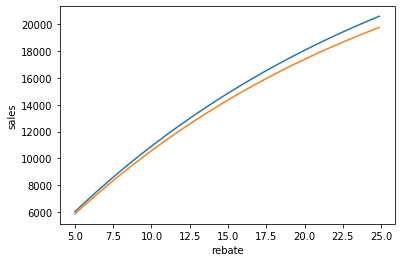

In [45]:
# rebate interpretation
tmp_x = np.linspace(data.rebate.min(), data.rebate.max(), num=1000)
tmp_y= final_solv.x[1] * diminishing_return(tmp_x, final_solv.x[6]) / final_solv.x[6]
plt.plot(tmp_x, tmp_y)
tmp_y2 = final_solv.x[1] * diminishing_return(tmp_x, final_solv.x[6]) / final_solv.x[6] + final_solv.x[4] * tmp_x
plt.plot(tmp_x, tmp_y2)
plt.xlabel('rebate')
plt.ylabel('sales')

Text(0, 0.5, 'sales')

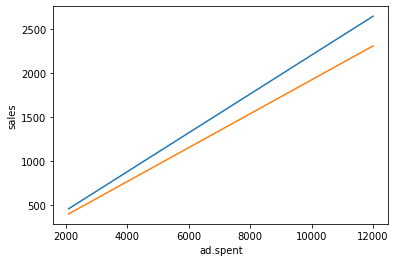

In [46]:
# ad.spent interpretation
tmp_x = np.linspace(data['ad.spent'].min(), data['ad.spent'].max(), num=10000)
tmp_y = final_solv.x[2]*tmp_x
plt.plot(tmp_x, tmp_y)
tmp_y2 = final_solv.x[2]*tmp_x + final_solv.x[5]*tmp_x
plt.plot(tmp_x, tmp_y2)
plt.xlabel('ad.spent')
plt.ylabel('sales')

<h2> Interprete with normalized data</h2>

In [47]:
n_final_solv = least_squares(least_square_func, final_c, args = (n_x,n_y,final_model))
n_final_solv.x

array([ 0.12929767,  0.24851892,  0.94154413, -0.88070663, -0.2849164 ,
       -0.11990389,  0.23512194])

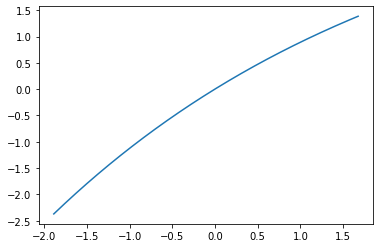

In [48]:
r_x = np.linspace(n_data['rebate'].min(), n_data['rebate'].max(), num=1000)
r_r = n_final_solv.x[6]
plt.plot(r_x, diminishing_return(r_x, r_r))

-0.5882885334297343

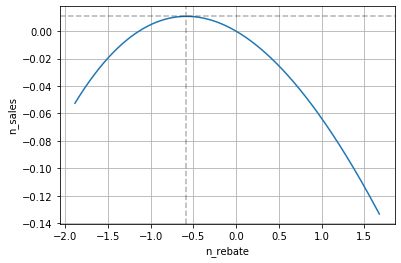

In [49]:
r_y = n_final_solv.x[1] * diminishing_return(r_x,r_r) + (n_final_solv.x[4]*r_x*n_data['xmas'].max())
plt.plot(r_x, r_y)
plt.axhline(r_y[364], color='black', linestyle='--', alpha=.3)
plt.axvline(r_x[364], color='black', linestyle='--', alpha=.3)
plt.xlabel('n_rebate')
plt.ylabel('n_sales')
plt.grid()
r_y.argmax()
r_x[364]

In [50]:
best_rebate = r_x[364]*data['rebate'].std()+data['rebate'].mean()
best_rebate

12.245418713176388

Text(0, 0.5, 'n_sales')

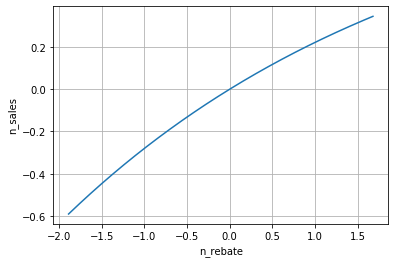

In [51]:
r_y = n_final_solv.x[1] * diminishing_return(r_x,r_r) + (n_final_solv.x[4]*r_x*n_data['xmas'].min())
plt.plot(r_x, r_y)
plt.grid()
plt.xlabel('n_rebate')
plt.ylabel('n_sales')

0.9415441277633975

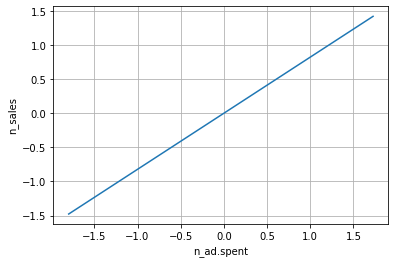

In [52]:
a_x = np.linspace(n_data['ad.spent'].min(), n_data['ad.spent'].max(), num=100)
a_y = n_final_solv.x[2] * a_x + (n_final_solv.x[5] * a_x * n_data['xmas'].max())
plt.plot(a_x, a_y)
plt.grid()
plt.xlabel('n_ad.spent')
plt.ylabel('n_sales')
n_final_solv.x[2]

Text(0, 0.5, 'n_sales')

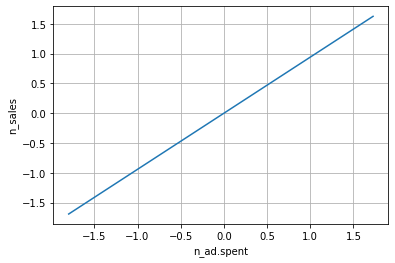

In [53]:
a_x = np.linspace(n_data['ad.spent'].min(), n_data['ad.spent'].max(), num=100)
a_y = n_final_solv.x[2] * a_x + (n_final_solv.x[5] * a_x * n_data['xmas'].min())
plt.plot(a_x, a_y)
plt.grid()
n_x[2].max()
plt.xlabel('n_ad.spent')
plt.ylabel('n_sales')


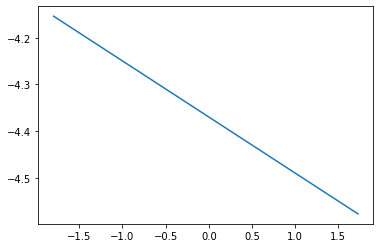

In [54]:
# xmas best choice
tmp_x = np.linspace(n_data['ad.spent'].min(), n_data['ad.spent'].max(), num=1000)
tmp_y = n_final_solv.x[3] + n_final_solv.x[4] * best_rebate + n_final_solv.x[5]*tmp_x
plt.plot(tmp_x, tmp_y)